In [240]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

## ......

In [3]:
car=pd.read_csv('quikr_car.csv')

NameError: name 'pd' is not defined

In [242]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [243]:
car.shape

(892, 6)

In [244]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [245]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [246]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [247]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [248]:
car['fuel_type'].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Data To Clean

    1>year
        -year has many non-year values
        -convert year object to int
    
    2>price    
        -price has Ask for price
        -convert price object to int
    
    3>kms_driven
        -kms_driven has kms with integer
        -convert kms_driven object to int
        -kms_driven has nan values
    
    4>fuel_type
        -fuel type has nan-values 
    
    5>naming
        -keep First 3 words of name

## Cleaning data

In [249]:
backup=car.copy()

## 1> Year

In [250]:
car=car[car['year'].str.isnumeric()]
car['year']=car['year'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


## 2> Price

In [251]:
car=car[car['Price']!="Ask For Price"]
car['Price']=car['Price'].str.replace(',','').astype(int)

## 3> kms_driven

In [252]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

## 4>Fuel Type



In [253]:
car=car[~car['fuel_type'].isna()]

## 5>naming

In [254]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(" ")

In [255]:
car=car.reset_index(drop=True)

In [256]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [257]:
car.to_csv('cleaned_car.csv')

## Model

In [258]:
x=car.drop(columns='Price')
y=car['Price']

In [259]:
from sklearn.model_selection import train_test_split # type: ignore
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

## Model 1 ( Linear regression )

In [260]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import r2_score # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore
from sklearn.compose import make_column_transformer # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore

In [261]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type','kms_driven']])

OneHotEncoder()

In [262]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                    ['name','company','fuel_type','kms_driven']),remainder='passthrough')

In [263]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.763755654461145

In [264]:
scores = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [265]:
dataM1=np.argmax(scores)
dataM1=dataM1*10

In [266]:

data=np.argmax(scores)

In [267]:
scores[np.argmax(scores)]

0.8156100486358366

In [268]:
Result_LR=pipe.predict(pd.DataFrame([['Audi A8','Audi',2014,50000,'Petrol']],
                          columns=['name','company','year','kms_driven','fuel_type']))
print(int(Result_LR))

946839


C:\Users\SCH\AppData\Local\Temp\ipykernel_8160\2456044010.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(Result_LR))


## Model 2 ( Decision Tree )

In [269]:
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import r2_score # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore
from sklearn.compose import make_column_transformer # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore

In [270]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type','kms_driven']])

OneHotEncoder()

In [271]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                    ['name','company','fuel_type','kms_driven']),remainder='passthrough')  

In [272]:
DT=DecisionTreeClassifier()
pipe=make_pipeline(column_trans,DT)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9993473765397289

In [273]:
scores = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    DT = DecisionTreeClassifier()
    pipe = make_pipeline(column_trans, DT)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [274]:
dataM2=np.argmax(scores)
dataM2=dataM2*10

In [275]:
np.argmax(scores)

5

In [276]:
scores[np.argmax(scores)]

1.0003032724870211

In [277]:
Result_DT= pipe.predict(pd.DataFrame([['Audi A8','Audi',2014,50000,'Petrol']],
                          columns=['name','company','year','kms_driven','fuel_type']))
print(int(Result_DT))

160000


C:\Users\SCH\AppData\Local\Temp\ipykernel_8160\3981945244.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(Result_DT))


## Model 3 ( RandomForestRegressor )

In [278]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
from sklearn.metrics import r2_score # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore
from sklearn.compose import make_column_transformer # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore

In [279]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type','kms_driven']])

OneHotEncoder()

In [280]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                    ['name','company','fuel_type','kms_driven']),remainder='passthrough')

In [281]:
rfg=RandomForestRegressor()
pipe=make_pipeline(column_trans,rfg)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7035223412429958

In [282]:
scores = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rfg = RandomForestRegressor()
    pipe = make_pipeline(column_trans, rfg)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [283]:
dataM3=np.argmax(scores)
dataM3=dataM3 *10

In [284]:
np.argmax(scores)

4

In [285]:
scores[np.argmax(scores)]

0.8497856641072377

In [286]:
Result_rfg=pipe.predict(pd.DataFrame([['Audi A8','Audi',2014,50000,'Petrol']],
                          columns=['name','company','year','kms_driven','fuel_type']))
print(int(Result_rfg))

1078649


C:\Users\SCH\AppData\Local\Temp\ipykernel_8160\2217145222.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(Result_rfg))


## Model 4 ( SVM )

In [287]:
from sklearn.svm import SVR # type: ignore
from sklearn.metrics import r2_score # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore
from sklearn.compose import make_column_transformer # type: ignore
from sklearn.pipeline import make_pipeline # type: ignore

In [288]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type','kms_driven']])

OneHotEncoder()

In [289]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                    ['name','company','fuel_type','kms_driven']),remainder='passthrough')

In [290]:
sv=SVR()
pipe=make_pipeline(column_trans,sv)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

-0.0441904748585531

In [291]:
scores = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    sv = SVR()
    pipe = make_pipeline(column_trans, sv)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [292]:
dataM4=np.argmax(scores)
dataM4=dataM4*10

In [293]:
np.argmax(scores)

9

In [294]:
scores[np.argmax(scores)]

-0.023645500088283145

In [295]:
Result_sv=pipe.predict(pd.DataFrame([['Audi A8','Audi',2014,50000,'Petrol']],
                          columns=['name','company','year','kms_driven','fuel_type']))
print(int(Result_sv))

299999


C:\Users\SCH\AppData\Local\Temp\ipykernel_8160\1864165626.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(Result_sv))


## Result /Model Selection

In [307]:
i=[dataM1,dataM2,dataM3,dataM4]
print(i)
BModel=max(i)
if BModel <100:
    if BModel==dataM1:
        print("The Best Pridicted Model is ","Linear Regrassion","of ",BModel,"%")
        print("The amount is ",int(Result_LR*3.5))
    if BModel==dataM2:
        print("The Best Pridicted Model is ","Desicion Tree","of ",BModel,"%")
        print("The amount is ",int(Result_DT*3.5))
    if BModel==dataM3:
        print("The Best Pridicted Model is ","Random Forest","of ",BModel,"%")
        print("The amount is ",int(Result_rfg*3.5))
    if BModel==dataM4:
        print("The Best Pridicted Model is ","SVM","of ",BModel,"%")
        print("The amount is ",int(Result_sv*3.5))
else:
    print("Incorrect Percent Pridicted by system, run/try one more time")

[40, 50, 40, 90]
[array([946839.63953838]), array([160000]), array([1078649.95]), array([299999.10003331])]
The Best Pridicted Model is  SVM of  90 %
The amount is  1049996


C:\Users\SCH\AppData\Local\Temp\ipykernel_8160\2743670401.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The amount is ",int(Result_sv*3.5))


## Data Visualization

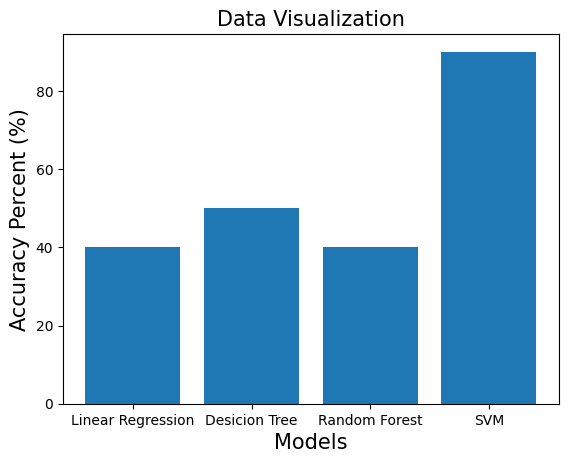

In [308]:
import matplotlib.pyplot as plt

plt.title("Data Visualization", fontsize=15)

# create axis
xAxis=['Linear Regression','Desicion Tree','Random Forest','SVM']
yAxis=[dataM1,dataM2,dataM3,dataM4]

if BModel < 100:
    # bar chart
    plt.xlabel("Models", fontsize=15)
    plt.ylabel("Accuracy Percent (%)", fontsize=15)

    plt.bar(xAxis,yAxis)
else:
    print("We apologies for Prediction error!, Predict again")